In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Absenteeism_at_work_Data Set.csv",sep=";")
pd.set_option("display.max_columns",None)
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [3]:
df.shape

(740, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [5]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

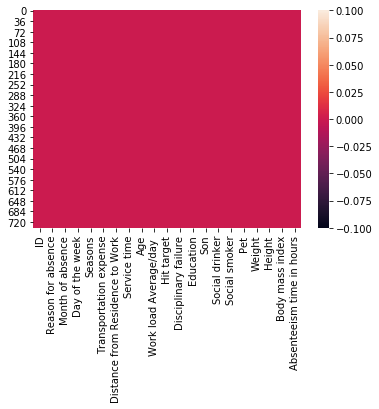

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [8]:
#Checking the unique values and their count
for i in df.columns:
    print(df[i].value_counts())
    print()

3     113
28     76
34     55
22     46
20     42
11     40
15     37
36     34
24     30
14     29
33     24
10     24
1      23
17     20
5      19
18     16
13     15
25     10
6       8
9       8
23      8
27      7
30      7
12      7
7       6
2       6
29      5
26      5
32      5
31      3
19      3
21      3
16      2
8       2
35      1
4       1
Name: ID, dtype: int64

23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
8       6
21      6
9       4
5       3
24      3
16      3
4       2
15      2
3       1
2       1
17      1
Name: Reason for absence, dtype: int64

3     87
2     72
10    71
7     67
5     64
11    63
8     54
6     54
9     53
4     53
1     50
12    49
0      3
Name: Month of absence, dtype: int64

2    161
4    156
3    154
6    144
5    125
Name: Day of the week, dtype: int64

4    195
2    192
3    183
1    170
Name: Seasons, dtype: i

In [9]:
df.corr()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,1.000000,-0.064245,-0.000043,0.034468,0.098495,-0.224163,-0.486160,-0.272704,0.040899,0.092457,0.018789,0.004502,-0.036254,0.002767,-0.451338,-0.010826,-0.041418,-0.254222,0.076363,-0.306924,-0.017997
Reason for absence,-0.064245,1.000000,-0.083858,0.116319,-0.117925,-0.119381,0.161831,0.048425,-0.078608,-0.123472,0.088943,-0.545054,-0.047357,-0.055364,0.065441,-0.115702,-0.055911,-0.000269,-0.079267,0.037205,-0.173116
Month of absence,-0.000043,-0.083858,1.000000,-0.006528,0.407770,0.137525,-0.003887,-0.062862,-0.001520,-0.169989,-0.460453,0.107946,-0.066128,0.079031,0.056226,-0.038603,0.047787,0.023278,-0.068942,0.051046,0.024345
Day of the week,0.034468,0.116319,-0.006528,1.000000,0.046493,0.033988,0.118026,0.021252,0.004459,0.015646,0.030986,-0.015120,0.058516,0.098079,0.041772,0.013156,-0.028885,-0.128980,-0.082133,-0.103578,-0.124361
Seasons,0.098495,-0.117925,0.407770,0.046493,1.000000,0.036995,-0.063108,-0.010904,-0.012089,0.150439,-0.061154,0.151766,-0.002951,0.046950,-0.045982,-0.048671,0.012356,-0.026278,-0.033737,-0.011031,-0.005615
Transportation expense,-0.224163,-0.119381,0.137525,0.033988,0.036995,1.000000,0.262183,-0.349887,-0.227542,0.005438,-0.080193,0.109222,-0.055065,0.383001,0.145117,0.044356,0.400080,-0.207435,-0.194496,-0.136517,0.027585
Distance from Residence to Work,-0.486160,0.161831,-0.003887,0.118026,-0.063108,0.262183,1.000000,0.131730,-0.145886,-0.068677,-0.013865,-0.056527,-0.259605,0.054230,0.452196,-0.075369,0.205941,-0.047859,-0.353372,0.113772,-0.088363
Service time,-0.272704,0.048425,-0.062862,0.021252,-0.010904,-0.349887,0.131730,1.000000,0.670979,-0.000668,-0.007840,-0.000221,-0.213000,-0.047128,0.353141,0.072424,-0.440301,0.455975,-0.053135,0.499718,0.019029
Age,0.040899,-0.078608,-0.001520,0.004459,-0.012089,-0.227542,-0.145886,0.670979,1.000000,-0.039425,-0.039224,0.104304,-0.221882,0.056984,0.213183,0.121738,-0.231226,0.418730,-0.062997,0.470688,0.065760
Work load Average/day,0.092457,-0.123472,-0.169989,0.015646,0.150439,0.005438,-0.068677,-0.000668,-0.039425,1.000000,-0.089445,0.029026,-0.074960,0.027820,-0.033713,0.030968,0.007114,-0.038522,0.103315,-0.090709,0.024749


In [10]:
sns.heatmap?

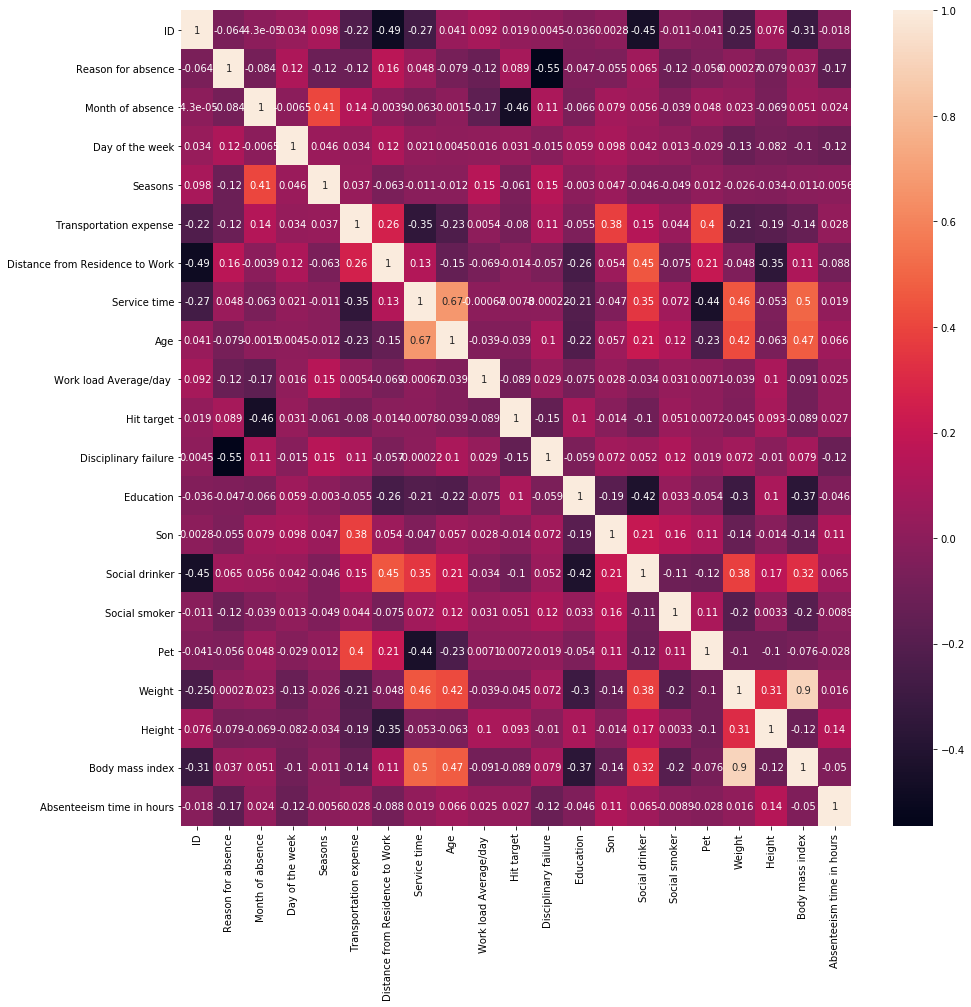

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [12]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

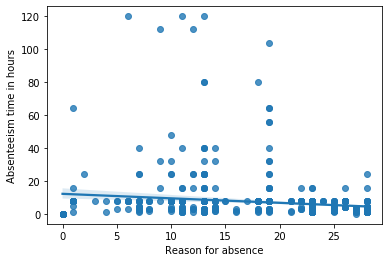

In [13]:
sns.regplot(x="Reason for absence",y="Absenteeism time in hours",data=df)

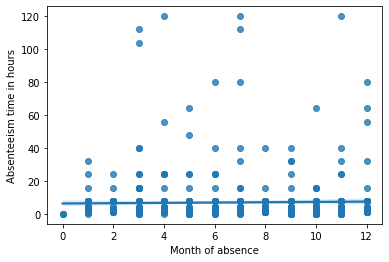

In [14]:
sns.regplot(x="Month of absence",y="Absenteeism time in hours",data=df)

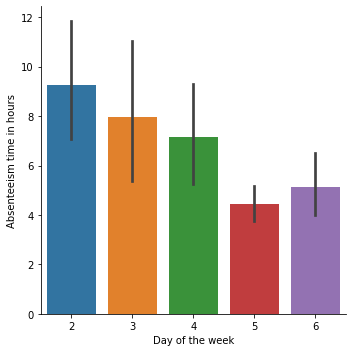

In [15]:
sns.catplot(x="Day of the week",y="Absenteeism time in hours",data=df,kind="bar")

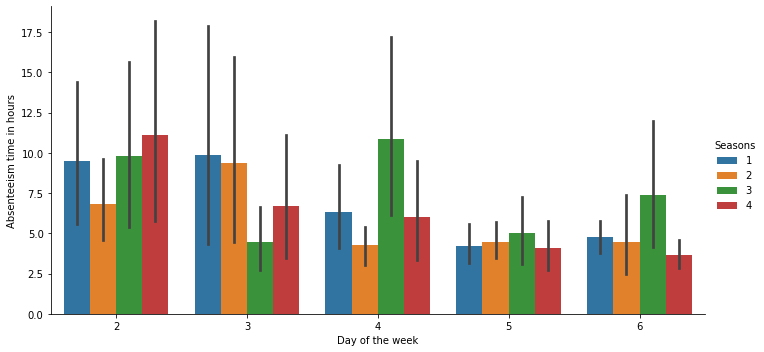

In [16]:
sns.catplot(x="Day of the week",y="Absenteeism time in hours",data=df,kind="bar",hue='Seasons',size=5,aspect=2)

<Figure size 864x720 with 0 Axes>

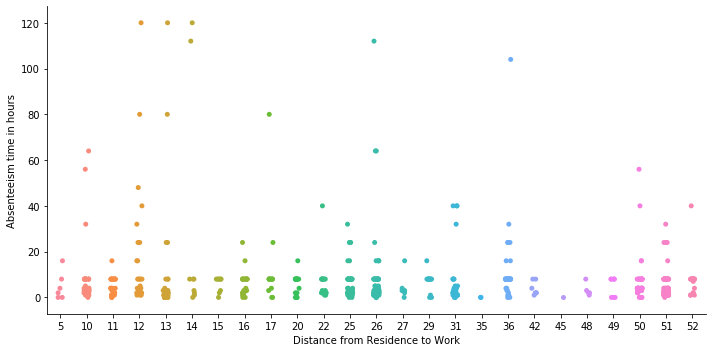

In [17]:
plt.figure(figsize=(12,10))
sns.catplot(x="Distance from Residence to Work",y="Absenteeism time in hours",data=df,size=5,aspect=2)
plt.show()

<Figure size 864x720 with 0 Axes>

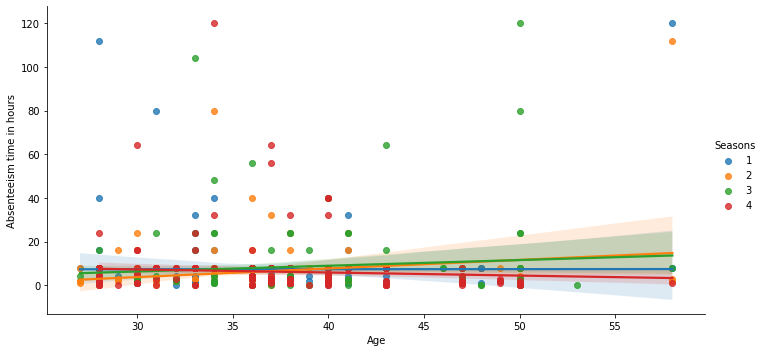

In [18]:
plt.figure(figsize=(12,10))
sns.lmplot(x="Age",y="Absenteeism time in hours",hue="Seasons",data=df,size=5,aspect=2)
plt.show()

<Figure size 864x720 with 0 Axes>

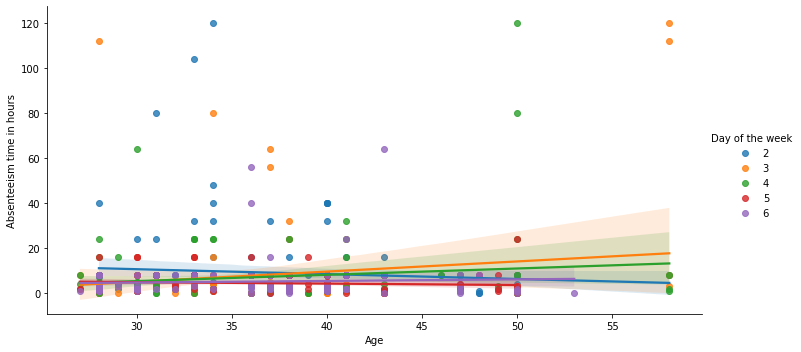

In [19]:
plt.figure(figsize=(12,10))
sns.lmplot(x="Age",y="Absenteeism time in hours",hue="Day of the week",data=df,size=5,aspect=2)
plt.show()

<Figure size 864x720 with 0 Axes>

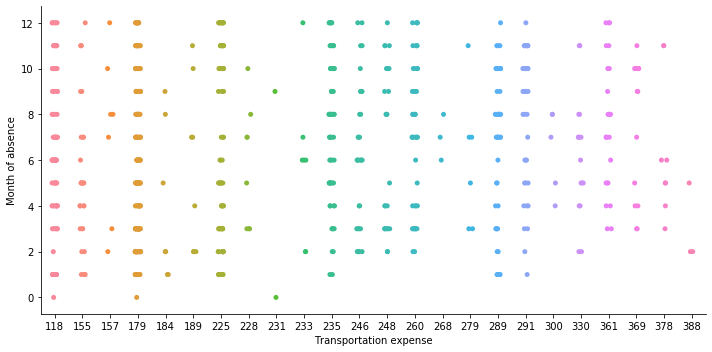

In [20]:
plt.figure(figsize=(12,10))
sns.catplot(x="Transportation expense",y="Month of absence",data=df,size=5,aspect=2)
plt.show()

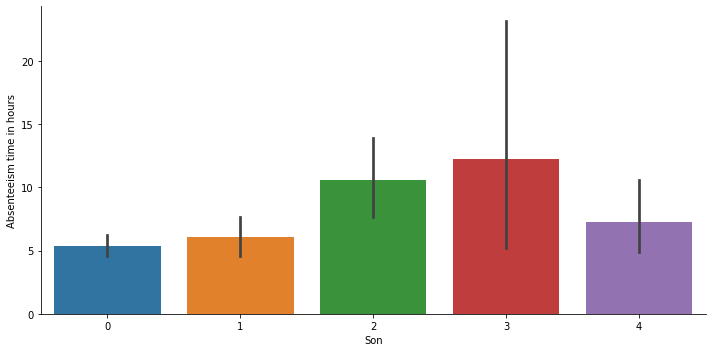

In [21]:
sns.catplot(x="Son",y="Absenteeism time in hours",data=df,kind="bar",size=5,aspect=2)

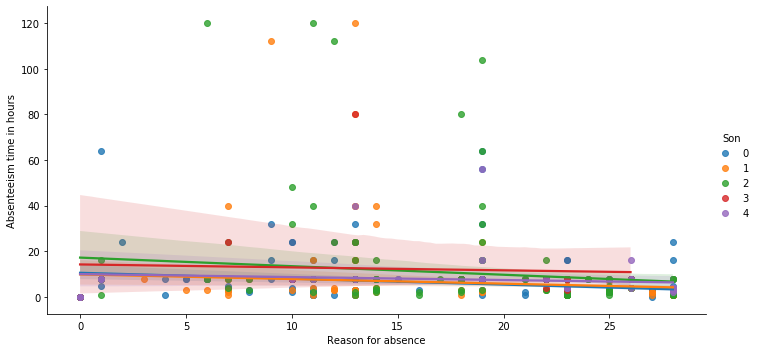

In [22]:
sns.lmplot(x="Reason for absence",y="Absenteeism time in hours",hue="Son",data=df,size=5,aspect=2)

In [23]:
# Checking outlier and remove them
print("data shape before zscore", df.shape)
from scipy.stats import zscore
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
print("data shape after zscore", df.shape)

data shape before zscore (740, 21)
data shape after zscore (576, 21)


In [24]:
# checking skewness
df.skew()

ID                                -0.058065
Reason for absence                -1.027334
Month of absence                   0.109690
Day of the week                    0.082048
Seasons                           -0.019301
Transportation expense             0.327717
Distance from Residence to Work    0.199294
Service time                      -0.153111
Age                                0.517042
Work load Average/day              1.019484
Hit target                        -0.461369
Disciplinary failure               0.000000
Education                          1.990046
Son                                1.447470
Social drinker                    -0.188822
Social smoker                      0.000000
Pet                                1.721238
Weight                            -0.128296
Height                             1.449688
Body mass index                    0.037118
Absenteeism time in hours          3.171312
dtype: float64

In [25]:
# splitting the Dataset into x and y
x=df.iloc[:,0:-1]
y=pd.DataFrame(df.iloc[:,-1])
print(x.head())
print(y.head())

   ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
2   3                  23                 7                4        1   
4  11                  23                 7                5        1   
5   3                  23                 7                6        1   
6  10                  22                 7                6        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
2                     179                               51            18   38   
4                     289                               36            13   33   
5                     179                               51            18   38   
6                     361                               52             3   28   

   Work load Average/day   Hit target  Disciplinary failure  Education  So

In [26]:
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.sqrt(x[i])

In [27]:
x.skew()

ID                                -0.058065
Reason for absence                -1.027334
Month of absence                   0.109690
Day of the week                    0.082048
Seasons                           -0.019301
Transportation expense             0.327717
Distance from Residence to Work    0.199294
Service time                      -0.153111
Age                                0.517042
Work load Average/day              0.844140
Hit target                        -0.461369
Disciplinary failure               0.000000
Education                          1.959022
Son                                0.360208
Social drinker                    -0.188822
Social smoker                      0.000000
Pet                                0.813730
Weight                            -0.128296
Height                             1.408211
Body mass index                    0.037118
dtype: float64

In [28]:
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.log1p(x[i])

In [29]:
x.skew()

ID                                -0.058065
Reason for absence                -1.027334
Month of absence                   0.109690
Day of the week                    0.082048
Seasons                           -0.019301
Transportation expense             0.327717
Distance from Residence to Work    0.199294
Service time                      -0.153111
Age                                0.517042
Work load Average/day              0.678441
Hit target                        -0.461369
Disciplinary failure               0.000000
Education                          1.942114
Son                                0.360208
Social drinker                    -0.188822
Social smoker                      0.000000
Pet                                0.628240
Weight                            -0.128296
Height                             1.369523
Body mass index                    0.037118
dtype: float64

In [30]:
type(x)

pandas.core.frame.DataFrame

In [31]:
#Scaling the test data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.631357,0.724903,0.207428,-0.657084,-1.403798,1.017195,0.338869,0.184695,-0.444868,-0.805094,0.668393,0.0,-0.432204,1.124768,0.910259,0.0,0.957533,0.928770,0.384388,0.742421
1,-1.330034,0.305261,0.207428,0.042510,-1.403798,-0.651616,1.356538,1.388141,0.385476,-0.805094,0.668393,0.0,-0.432204,-0.988114,0.910259,0.0,-0.769145,0.847368,-0.251256,0.982800
2,-0.631357,0.305261,0.207428,0.742105,-1.403798,1.017195,0.338869,0.184695,-0.444868,-0.805094,0.668393,0.0,-0.432204,1.124768,0.910259,0.0,0.957533,0.928770,0.384388,0.742421
3,-1.330034,0.305261,0.207428,1.441699,-1.403798,-0.651616,1.356538,1.388141,0.385476,-0.805094,0.668393,0.0,-0.432204,-0.988114,0.910259,0.0,-0.769145,0.847368,-0.251256,0.982800
4,-0.718692,0.165380,0.207428,1.441699,-1.403798,2.109508,1.424382,-2.222195,-1.275212,-0.805094,0.668393,0.0,-0.432204,0.505919,0.910259,0.0,1.967575,0.114754,0.384388,0.021284


# Train-Test-Split

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

def maxr2_score(regr,x,y):
    max_r2_score=0
    for r_state in range(42,100):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(train_x,train_y)
        pred=regr.predict(test_x)
        r2score=r2_score(test_y,pred)
        print("The r2 score at", r_state ,"is", r2score)
        if r2score>max_r2_score:
            max_r2_score=r2score
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r2_score)
    return final_r_state

In [33]:
#Lets use Linear Regression and check max r2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

The r2 score at 42 is 0.06361003041482716
The r2 score at 43 is 0.16268169072659644
The r2 score at 44 is 0.2025168777630808
The r2 score at 45 is 0.22489092039512948
The r2 score at 46 is 0.18367700107025398
The r2 score at 47 is 0.17313831851306538
The r2 score at 48 is 0.13161569134828766
The r2 score at 49 is 0.11478580022934559
The r2 score at 50 is 0.20490431597971948
The r2 score at 51 is -0.04463504427487597
The r2 score at 52 is 0.1101144931445649
The r2 score at 53 is 0.075962420084428
The r2 score at 54 is 0.14940590835780743
The r2 score at 55 is 0.1640963870939116
The r2 score at 56 is 0.18587778017453327
The r2 score at 57 is -0.028009152608830634
The r2 score at 58 is 0.20849157807682817
The r2 score at 59 is 0.13414862839738306
The r2 score at 60 is 0.16343683776178097
The r2 score at 61 is 0.1481474751197902
The r2 score at 62 is 0.1724984873389278
The r2 score at 63 is 0.2327072203671421
The r2 score at 64 is -0.17097955997377423
The r2 score at 65 is -0.1032357503836

In [34]:
#Finalising the train and test data based on the above scores
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=84,test_size=0.20)

In [35]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(460, 20)
(460, 1)
(116, 20)
(116, 1)


In [36]:
#Importing necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


In [37]:
#Checking gridsearch for different algorithms
sr=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sr,parameters)
gdsr.fit(train_x,train_y)
gdsr.best_params_

{'C': 1, 'kernel': 'linear'}

In [38]:
knn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(knn,parameters)
gdk.fit(train_x,train_y)
gdk.best_params_

{'n_neighbors': 10}

In [39]:
# checking the model and its metrics by running a set of codes.
score=[]
cv=[]
MSE=[]
RMSE=[]
MAE=[]
    
from sklearn.preprocessing import LabelBinarizer

algorithm=[LinearRegression(),SVR(C= 1, kernel= 'linear'),DecisionTreeRegressor(),KNeighborsRegressor(n_neighbors=10)]
for i in algorithm:
    l=i
    print(l)
    l.fit(train_x,train_y)
    pred=l.predict(test_x)
    r2score=r2_score(test_y,pred)
    print("R2 score", r2score)
    score.append(r2score)
    crossscore=cross_val_score(l,x,y,cv=5,scoring='r2').mean()
    print("The CV Score is", crossscore)
    cv.append(crossscore)
    mean_sqrd_error=mean_squared_error(test_y,pred)
    MSE.append(mean_sqrd_error)
    print("Mean Squared Error is", mean_sqrd_error )
    rootMSE=np.sqrt(mean_sqrd_error)
    RMSE.append(rootMSE)
    print("Root Mean Squared Error is: ",rootMSE)
    Meanabserror=mean_absolute_error(test_y,pred)
    MAE.append(Meanabserror)
    print("Mean Absolute Error is: ", Meanabserror)
    print("\n")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 score 0.2690278725746529
The CV Score is 0.07640819046373684
Mean Squared Error is 29.91700081243084
Root Mean Squared Error is:  5.469643572704792
Mean Absolute Error is:  3.1822273560023264


SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R2 score 0.241788046115321
The CV Score is 0.10934137396845518
Mean Squared Error is 31.03186399221403
Root Mean Squared Error is:  5.570625098874814
Mean Absolute Error is:  2.714256160029891


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=

In [40]:
result=pd.DataFrame({'Model':['LinearRegression','SVR','DecisionTreeRegressor','KNeighborsRegressor'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':MSE, 'Root Mean Squared Error': RMSE, 'Mean Absolute Error':MAE})
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error
0,LinearRegression,0.269028,0.076408,29.917001,5.469644,3.182227
1,SVR,0.241788,0.109341,31.031864,5.570625,2.714256
2,DecisionTreeRegressor,-0.031361,-0.949272,42.211207,6.497015,3.456897
3,KNeighborsRegressor,0.240713,0.045874,31.075862,5.574573,3.063793


In [41]:
#Since the models are not giving better scores, we can try Lasso 
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.1}

In [42]:
#Lets check max r2 score when to use
lsreg=Lasso(alpha=0.01)
r_state=maxr2_score(lsreg,x,y)

The r2 score at 42 is 0.06592396686353419
The r2 score at 43 is 0.15993162918304438
The r2 score at 44 is 0.20231644161216833
The r2 score at 45 is 0.22381264772950427
The r2 score at 46 is 0.18335303783712464
The r2 score at 47 is 0.16918882406792202
The r2 score at 48 is 0.13049535738012263
The r2 score at 49 is 0.11577818566900677
The r2 score at 50 is 0.21630951766342343
The r2 score at 51 is -0.03417379446786972
The r2 score at 52 is 0.11530429375819085
The r2 score at 53 is 0.08512909237421928
The r2 score at 54 is 0.1486350619440151
The r2 score at 55 is 0.16238206497899643
The r2 score at 56 is 0.18435818209611943
The r2 score at 57 is -0.0162911595345534
The r2 score at 58 is 0.2071418362705375
The r2 score at 59 is 0.16209562751163253
The r2 score at 60 is 0.1622430805434435
The r2 score at 61 is 0.14960668673890987
The r2 score at 62 is 0.17076532519457965
The r2 score at 63 is 0.22958479191679593
The r2 score at 64 is -0.15654092524384877
The r2 score at 65 is -0.0977335520

In [43]:
#Lets use cross val score with Lasso
print("Mean r2 score for Lasso Regression:", cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print("standard deviation in r2 score for Lasso Regression: ", cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())
#The lasso here is performing just like other models

Mean r2 score for Lasso Regression: 0.08447985582873947
standard deviation in r2 score for Lasso Regression:  0.08245599311883935


In [44]:
#Now we will have to use gradient boosting technique
#for getting best parameters we need to use grid search
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 100}

In [45]:
#Now we will use cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=100)
print("Mean r2 score for Gradient boosting Regression:", cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print("standard deviation in r2 score for Gradient boosting Regression: ", cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

Mean r2 score for Gradient boosting Regression: 0.1895768609139094
standard deviation in r2 score for Gradient boosting Regression:  0.030671282424649112


In [46]:
#Now we will have to use Adaboost Regression Algorithm 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
ada_reg=AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lreg,lsreg,dt]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 0.01,
 'n_estimators': 1000}

In [47]:
#Now we will use cross val score to check the mean r2 score and standard deviation
ada_reg=AdaBoostRegressor(base_estimator= dt,learning_rate=0.001,n_estimators=100)
print("Mean r2 score for Ada boosting Regression:", cross_val_score(ada_reg,x,y,cv=5,scoring='r2').mean())
print("standard deviation in r2 score for Ada boosting Regression: ", cross_val_score(ada_reg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Ada boosting Regression: 0.10183413749490103
standard deviation in r2 score for Ada boosting Regression:  0.1416096433798825


In [48]:
# Lets check the maximum r2 score corresponding to this
r_state=maxr2_score(ada_reg,x,y)

The r2 score at 42 is -0.5957787681407838
The r2 score at 43 is -0.06567540942833405
The r2 score at 44 is 0.09943963443551673
The r2 score at 45 is 0.15011093124010066
The r2 score at 46 is 0.2729029208809908
The r2 score at 47 is 0.15357670915992627
The r2 score at 48 is 0.05640607188696756
The r2 score at 49 is -0.304420050737763
The r2 score at 50 is -0.062238936772498255
The r2 score at 51 is -0.0057065371708107104
The r2 score at 52 is -0.5838937226788967
The r2 score at 53 is 0.13364717154387373
The r2 score at 54 is 0.027900021321688673
The r2 score at 55 is 0.0402685297654104
The r2 score at 56 is -0.09648191780570281
The r2 score at 57 is -0.19115390293158163
The r2 score at 58 is -0.04039554710183357
The r2 score at 59 is 0.06263708475418894
The r2 score at 60 is 0.17577713393646965
The r2 score at 61 is 0.460178608824227
The r2 score at 62 is 0.22009258133106602
The r2 score at 63 is 0.11953576589595372
The r2 score at 64 is -1.1675156486758085
The r2 score at 65 is -0.2260

In [49]:
ada_reg.fit(train_x,train_y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
               

In [50]:
ada_reg.score(train_x,train_y)

0.954358329161837

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
r_state=maxr2_score(rf,x,y)

The r2 score at 42 is -0.2002700469262113
The r2 score at 43 is 0.14981532910733109
The r2 score at 44 is 0.2656489196563919
The r2 score at 45 is 0.2100457573576865
The r2 score at 46 is 0.17459225215042273
The r2 score at 47 is 0.2469112783840557
The r2 score at 48 is 0.19374653932030372
The r2 score at 49 is -0.1839409850413085
The r2 score at 50 is 0.178222265467185
The r2 score at 51 is 0.08058903819259211
The r2 score at 52 is -0.12056093091322673
The r2 score at 53 is 0.07423847928393246
The r2 score at 54 is 0.04443409429566736
The r2 score at 55 is 0.18942772325514157
The r2 score at 56 is 0.11336439603015347
The r2 score at 57 is 0.07656640069146592
The r2 score at 58 is 0.24736106598770857
The r2 score at 59 is 0.23206047166792498
The r2 score at 60 is 0.2083517011882111
The r2 score at 61 is 0.28804134031974316
The r2 score at 62 is 0.1508570578281856
The r2 score at 63 is 0.3001550285664013
The r2 score at 64 is -0.6738868279289918
The r2 score at 65 is -0.1528169289065244

In [52]:
rf=RandomForestRegressor(n_estimators=200,random_state=100)

In [53]:
rf.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=100, verbose=0, warm_start=False)

In [54]:
rf.score(train_x,train_y)

0.8491140501940857

In [55]:
#After trying all above let us finalise the model. AdaBoostRegressor is providing the highest accuracy score at 47%
ada_reg=AdaBoostRegressor(base_estimator= dt,learning_rate=0.001,n_estimators=100)
ada_reg.fit(train_x,train_y)
print(ada_reg.score(train_x,train_y))
pred=ada_reg.predict(test_x)
print(pred)
ada_reg.score(test_x,test_y)

0.9533031808668857
[ 3.          1.          3.          3.          3.          3.
 16.          3.          2.          8.          8.          2.
  4.          8.          2.          3.          2.          1.
  8.          8.          8.          8.          2.          8.
  3.          1.          8.          4.          8.          8.
  8.          3.          1.          4.          3.          4.
  2.          3.          8.          8.          2.          3.
  3.          4.          3.          3.          4.         16.
  3.          2.          2.          8.          2.          2.
  8.          8.          8.          8.          3.          3.
  2.          3.5         3.          2.          2.         24.
  1.          2.          8.          8.          2.          3.
  3.          8.          2.          2.          8.          4.
  8.          8.          2.          8.          3.          1.
  2.          3.          8.          3.          8.          5.5
  3. 

0.1312240656575283

In [56]:
print("The RMSE is", np.sqrt(mean_squared_error(test_y,pred)))
print("The r2_score is", r2_score(test_y,pred))

The RMSE is 5.962968416582864
The r2_score is 0.1312240656575283


In [57]:
# Saving The Model
from sklearn.externals import joblib
joblib.dump(ada_reg,"Absenteeism_At_Work.pkl")

['Absenteeism_At_Work.pkl']

In [58]:
ada_reg_from_joblib=joblib.load("Absenteeism_At_Work.pkl")

In [59]:
from sklearn.model_selection import cross_val_predict
score=cross_val_predict(ada_reg_from_joblib,x,y,cv=5)

In [60]:
score

array([ 8.        ,  4.        ,  8.        ,  3.        ,  8.        ,
        3.        ,  8.        ,  8.        ,  8.        ,  8.        ,
        8.        ,  4.        ,  8.        ,  3.        ,  8.        ,
        8.        ,  2.        ,  8.        ,  4.        ,  8.        ,
        4.        ,  8.        ,  3.        ,  8.        ,  8.        ,
        3.5       ,  8.        ,  3.        ,  4.        ,  2.        ,
        8.        ,  8.        ,  3.        ,  8.        ,  4.        ,
        4.        ,  8.        ,  4.        ,  4.        ,  2.        ,
        8.        ,  8.        ,  3.        ,  3.        ,  8.        ,
        3.        ,  2.        ,  3.        ,  3.        ,  3.        ,
        2.        ,  2.        ,  3.        ,  3.        ,  2.        ,
        3.        ,  2.        ,  2.        ,  3.        ,  3.        ,
        8.        ,  8.        ,  2.        ,  8.        ,  2.        ,
        3.        ,  1.        ,  2.5       ,  8.        ,  1.  